<a href="https://colab.research.google.com/github/fpiedra47/formula_1/blob/main/f1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Imports
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df_circuits= pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/circuits.csv")
df_circuits.head(1)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [ ]:
df_constructors_results = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/constructor_results.csv")
df_constructors_results.head(2)

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N


In [ ]:
df_constructors_standings = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/constructor_standings.csv")
df_constructors_standings.head(2)


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0


In [ ]:
df_constructors = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/constructors.csv")
df_constructors.head(2)


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber


In [ ]:
df_driver_standings = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/driver_standings.csv")
df_driver_standings.head(2)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0


In [ ]:
df_drivers = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/drivers.csv")
df_drivers.head(2)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld


In [ ]:
df_drivers.loc[:, 'nationality'].value_counts()

British              165
American             157
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              20
Australian            17
Dutch                 17
Spanish               15
Austrian              15
Canadian              14
Swedish               10
Finnish                9
New Zealander          9
Mexican                6
Irish                  5
Danish                 5
Uruguayan              4
Monegasque             4
Portuguese             4
Russian                4
Rhodesian              4
Colombian              3
Venezuelan             3
East German            3
Thai                   2
Indian                 2
Argentine-Italian      1
American-Italian       1
Polish                 1
Liechtensteiner        1
Chilean                1
Malaysian              1
Czech                  1
Hungarian              1


In [ ]:
f1 = df_drivers.loc[:,'nationality'] == 'German'
print (f1)

0      False
1       True
2       True
3      False
4      False
       ...  
848    False
849    False
850    False
851    False
852     True
Name: nationality, Length: 853, dtype: bool


In [ ]:
df_drivers.loc[f1,:].groupby('nationality')['surname'].count()

nationality
German    50
Name: surname, dtype: int64

Text(0, 0.5, 'Cantidad')

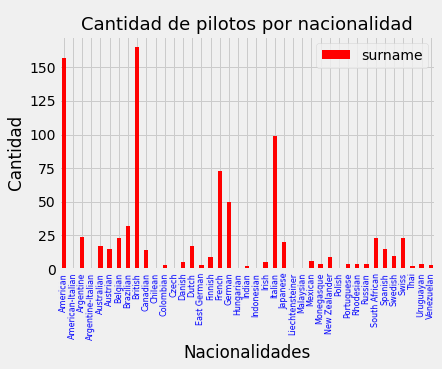

In [ ]:
df_drivers.groupby(['nationality'])[['surname']].count().plot(kind="bar", stacked=True, width = 0.47, color=['red','black'], alpha=1)
plt.xticks(rotation = 89, color='blue', fontsize=8)
plt.title('Cantidad de pilotos por nacionalidad', fontsize=18)
plt.suptitle("    ")
plt.xlabel("Nacionalidades")
plt.ylabel("Cantidad")

In [ ]:
df_lap_times= pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/lap_times.csv")
df_lap_times.head(2)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006


In [ ]:
df_pit_stops = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/pit_stops.csv")
df_pit_stops.head(2)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021


In [ ]:
df_quali = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/qualifying.csv")
df_quali.head(2)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869


In [ ]:
df_races = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/races.csv")
df_races.head(2)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...


In [ ]:
df_results = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/results.csv")
df_results.head(2)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1


In [ ]:
df_seasons= pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/seasons.csv")
df_seasons.head(2)

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...


In [ ]:
df_status= pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/f1/status.csv")
df_status.head(2)

,statusId,status
0,1,Finished
1,2,Disqualified


In [ ]:
for cont in df_circuits.columns:
   if df_circuits[cont].isna().sum() != 0:
       print(cont, '-', df_circuits[cont].isna().sum(), "Celdas Vacías")
"Ninguna de las bases de datos tienen celdas vacías"

In [ ]:
#df_circuits.isnull().sum()
#df_constructors_results.isnull().sum()
#df_constructors_standings.isnull().sum()
#df_constructors.isnull().sum()
#df_driver_standings.isnull().sum()
#df_drivers.isnull().sum()
#df_lap_times.isnull().sum()
#df_pit_stops.isnull().sum()
#df_quali.isnull().sum()
#df_races.isnull().sum()
#df_results.isnull().sum() 
#df_seasons.isnull().sum()
df_status.isnull().sum()

statusId    0
status      0
dtype: int64

In [ ]:
data = dict(type = 'choropleth',
            locations = [str(country).lower() for country in df_circuits['country'].unique()],
            locationmode = 'country names',
            colorscale = 'Blues',
            z = list(range(1, len(df_circuits['country'].unique())+1)),
            colorbar = {'title':'Circuitos (ID)'})
layout = dict(geo = {'scope' : 'world', 'projection':{'type':'equirectangular'}})
world_map = gobj.Figure(data = [data], layout = layout)
iplot(world_map)

"https://plotly.com/python/choropleth-maps/"
"https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/"
"https://stackoverflow.com/questions/32041078/plotly-map-projection-types"

'https://stackoverflow.com/questions/32041078/plotly-map-projection-types'

In [12]:
coord = []
for lat,lng in zip(df_circuits['lat'],df_circuits['lng']):
  coord.append([lat,lng])

In [13]:
import folium
from  folium  import  plugins
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=2,tiles='Stamen Terrain')
#https://www.geeksforgeeks.org/stamen-toner-stamen-terrain-and-mapbox-bright-maps-in-python-folium/

In [14]:
mapa.add_child(plugins.HeatMap(coord))
mapa